In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets/fitness_class.csv'
fitness = pd.read_csv(file_path)

Validating our variables based on their description:

| Column Name | Criteria |
|-------------|----------|
| booking_id      | Nominal. The unique identifier of the booking. Missing values are not possible.                      |
| months_as_member | Discrete. The number of months as this fitness club member, minimum 1 month. Replace missing values with the overall average month. |
| weight          | Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg. Replace missing values with the overall average weight. |
| days_before     | Discrete. The number of days before the class the member registered, minimum 1 day. Replace missing values with 0. |
| day_of_week     | Nominal. The day of the week of the class. One of “Mon”, “Tue”, …, “Sun”. Replace missing values with “unknown”. |
| time            | Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.   |
| category        | Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, …, “Cycling”. Replace missing values with “unknown”. |
| attended        | Nominal. Whether the member attended the class (1) or not (0). Missing values should be removed.     |


In [ ]:
# @title Verifying dataset's attributes
import pandas as pd

def validate_categoric(dataframe_name, attribute_name, allowed_values=None, search_duplicates=False):
    print(attribute_name + ':')
    if allowed_values is not None:
      invalid_values = dataframe_name[~dataframe_name[attribute_name].isin(allowed_values)][attribute_name]
      if not invalid_values.empty:
          print("Invalid {} values found:".format(attribute_name))
          print(invalid_values.unique())
    else:
        print("No invalid {} values found.".format(attribute_name))

    missing_values = dataframe_name[attribute_name].isna().sum()
    print("Missing values: {}".format(missing_values))

    if allowed_values is not None:
      expected_values = ", ".join(str(value) for value in allowed_values)
      found_values = ", ".join(dataframe_name[attribute_name].astype('str').unique())
      print("Expected values: {}   Found values: {}".format(expected_values, found_values))

    if search_duplicates:
        duplicate_values = dataframe_name[dataframe_name.duplicated(subset=[attribute_name])]
        if not duplicate_values.empty:
            print("Duplicate {} values found:".format(attribute_name))
            print(duplicate_values[attribute_name].unique())
        else:
            print('No duplicate values found.')

    expected_data_type = 'category'
    found_data_type = dataframe_name[attribute_name].dtype
    print("Expected data type: {}   Found data type: {}".format(expected_data_type, found_data_type))
    print('-----------------------------------------------------')

def validate_numeric(dataframe_name, attribute_name, min_value, data_type):
    print(attribute_name + ':')

    numeric_observations = dataframe_name[attribute_name].apply(lambda x: isinstance(x, (int, float)) or (isinstance(x, str) and x.isdigit()))
    numeric_subset = dataframe_name[numeric_observations]

    invalid_values = (numeric_subset[numeric_subset[attribute_name].astype(float) < min_value][attribute_name].unique()).tolist()
    invalid_values.extend(dataframe_name[~numeric_observations][attribute_name].unique().tolist())

    if invalid_values:
        print("Invalid {} values found:".format(attribute_name))
        print(invalid_values)
    else:
        print("No invalid {} values found.".format(attribute_name))

    missing_values = dataframe_name[attribute_name].isna().sum()
    print("Missing values: {}".format(missing_values))

    min_found_value = dataframe_name[attribute_name].min()
    print("Minimum value expected: {}  Minimum value found: {}".format(min_value, min_found_value))

    expected_data_type = data_type
    found_data_type = dataframe_name[attribute_name].dtype
    print("Expected data type: {}   Found data type: {}".format(expected_data_type, found_data_type))
    print('-----------------------------------------------------')


validate_categoric(fitness, 'booking_id',search_duplicates=True)
validate_numeric(fitness, 'months_as_member', 1, 'int64')
validate_numeric(fitness, 'weight', 40.00, 'float64')
validate_numeric(fitness, 'days_before', 1, 'int64')
validate_categoric(fitness, 'day_of_week', ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
validate_categoric(fitness, 'time', ["AM", "PM"])
validate_categoric(fitness, 'category', ["Yoga", "Aqua", "Strength", "HIIT", "Cycling"])
validate_categoric(fitness, 'attended', [0, 1])



booking_id:
No invalid booking_id values found.
Missing values: 0
No duplicate values found.
Expected data type: category   Found data type: int64
-----------------------------------------------------
months_as_member:
No invalid months_as_member values found.
Missing values: 0
Minimum value expected: 1  Minimum value found: 1
Expected data type: int64   Found data type: int64
-----------------------------------------------------
weight:
No invalid weight values found.
Missing values: 20
Minimum value expected: 40.0  Minimum value found: 55.41
Expected data type: float64   Found data type: float64
-----------------------------------------------------
days_before:
Invalid days_before values found:
['12 days', '6 days', '13 days', '3 days', '1 days', '7 days', '8 days', '10 days', '14 days', '5 days', '2 days', '4 days']
Missing values: 0
Minimum value expected: 1  Minimum value found: 1
Expected data type: int64   Found data type: object
-------------------------------------------------

**Are the Feature Values Aligned with Their Descriptions?**

- **booking_id**: No, the type of the column is `int64` when it should be of type `category` as it is a nominal value.
- **months_as_member**: Yes, the values match the description.
- **weight**: Yes, the values match the description.
- **days_before**: No, some values have the 'days' suffix, and the type of the values is `object`.
- **day_of_week**: No, some values are entered in a different format, and the data type is `object` and not `category`.
- **time**: The values in this column do not match the description. The column's data type is currently 'object', but according to the description, it should be an ordinal categorical data type.
- **category**: No, due to missing values being registered as dashes `-`.
- **attended**: No, the type of the column is `int64` when it should be categorical.



**Number of Missing Values in Each Column**

- **booking_id**: 0
- **months_as_member**: 0
- **weight**: 20
- **days_before**: 0
- **day_of_week**: 0
- **time**: 0
- **category**: 13
- **attended**: 0

In [ ]:
# @title Cleaning attributes

fitness['booking_id'] = fitness['booking_id'].astype('category')

average_weight = fitness['weight'].mean()
fitness['weight'].fillna(average_weight, inplace=True)

fitness['days_before'] = fitness['days_before'].str.replace(' days', '').astype(int)

day_name_mapping = {
    'Wednesday': 'Wed',
    'Fri.': 'Fri',
    'Monday': 'Mon'
}
fitness['day_of_week'] = fitness['day_of_week'].replace(day_name_mapping).astype('category')

time_order = ['AM', 'PM']
fitness['time'] = pd.Categorical(fitness['time'], categories=time_order, ordered=True)

fitness['category'] = fitness['category'].replace('-', 'unknown')

fitness['attended'] = fitness['attended'].astype('category')

***Process to correct attributes***

- **booking_id**:
  - Convert the 'booking_id' column to the 'category' data type.

- **weight**:
  - Calculate the mean weight.
  - Fill missing weight values with the calculated mean.
  
- **days_before**:
  - Remove the 'days' suffix from each value.
  - Convert the 'days_before' column to integer data type.
  
- **day_of_week**:
  - Convert all values to title case.
  - Remove all non-alphabetic characters.
  - Create a dictionary to map invalid day names to valid abbreviations.
  - Replace invalid day names using the created dictionary.
  - Convert the 'day_of_week' column to the 'category' data type.
  
- **time**:
  - Define an order for time categories ('AM' and 'PM').
  - Convert the 'time' column to an ordinal categorical data type using the defined order.

- **category**:
  - Replace all dashes '-' with 'unknown' to handle missing values.
  - Convert the 'category' column to the 'category' data type.

- **attended**:
  - Convert the 'attended' column to the 'category' data type.


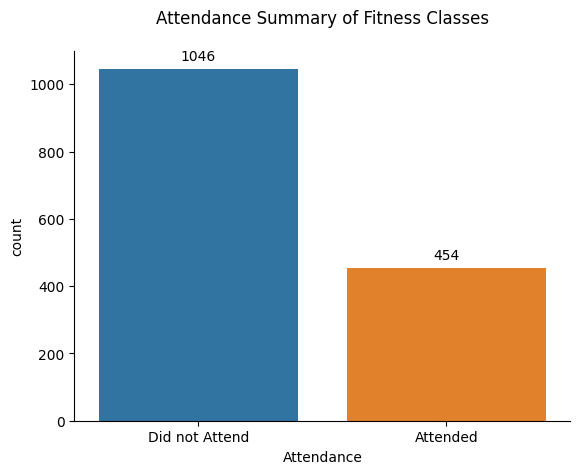

In [ ]:
# @title Attendance Summary of Fitness Classes Plot

import seaborn as sns
import matplotlib.pyplot as plt

attendee_plot = sns.countplot(x='attended',data=fitness,)
custom_x_ticks = ['Did not Attend', 'Attended']
attendee_plot.set_xticks(range(len(custom_x_ticks)))
attendee_plot.set_xticklabels(custom_x_ticks)
attendee_plot.set_xlabel('Attendance')
attendee_plot.set_title('Attendance Summary of Fitness Classes',pad=20)
import numpy as np

for p in attendee_plot.patches:
    attendee_plot.annotate(format(round(p.get_height())),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 9),
                           textcoords = 'offset points')

sns.despine(top=True, right=True)
plt.show()

The category value '0', representing the event that a member did not attend the class, holds the highest frequency of observations within the dataset.

The distribution of the 'attended' category is not uniform across its categories. The count of members who did not attend the class is significantly greater than the count of members who did attend.


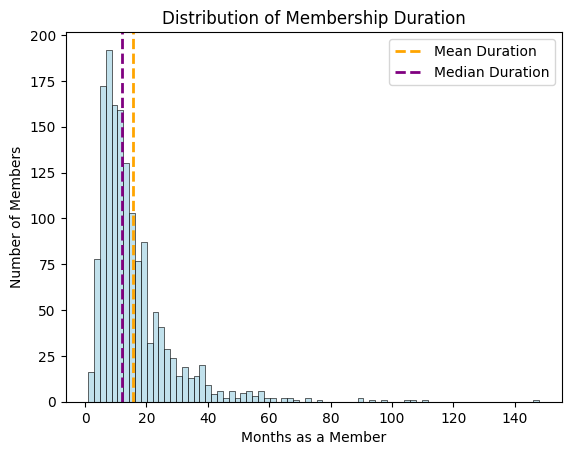

In [ ]:
# @title Distribution of Memebership Duration Histogram

months_dist = sns.histplot(fitness['months_as_member'],color='lightblue')
months_dist.set(xlabel='Months as a Member', ylabel='Number of Members')
months_dist.set_title('Distribution of Membership Duration')

mean_value = fitness['months_as_member'].sum()/len(fitness['months_as_member'])
months_dist.axvline(mean_value, color='orange', linestyle='dashed', linewidth=2, label='Mean Duration')

median_value = np.median(fitness['months_as_member'])
months_dist.axvline(median_value, color='purple', linestyle='dashed', linewidth=2, label='Median Duration')

months_dist.legend()

plt.show()

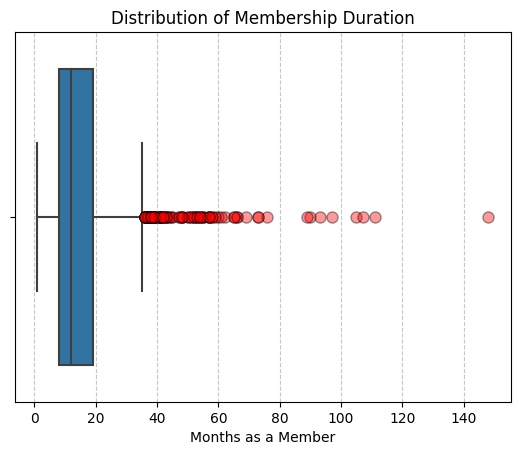

In [ ]:
# @title Distribution of Memebership Duration Boxplot
outlier_props = dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black', alpha=0.4)
months_as_member_box_dist = sns.boxplot(x=fitness['months_as_member'], flierprops=outlier_props)

months_as_member_box_dist.set_title("Distribution of Membership Duration")
months_as_member_box_dist.set(xlabel='Months as a Member')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


As observed in our in our histogram, our data exhibits positive skewness, indicating that a significant portion of values cluster towards the lower end of the range, especially within the 0 to 20 months range. We can also see on the boxplot that there are a few outliers on the higher end of the range. Due to this skewness, it's advisable to use the median duration as a representative measure of the average membership duration, as opposed to the mean value.

Furthermore, the skewness of the distribution can be quantified, yielding a value of 3.13, which aligns with our visual observations.

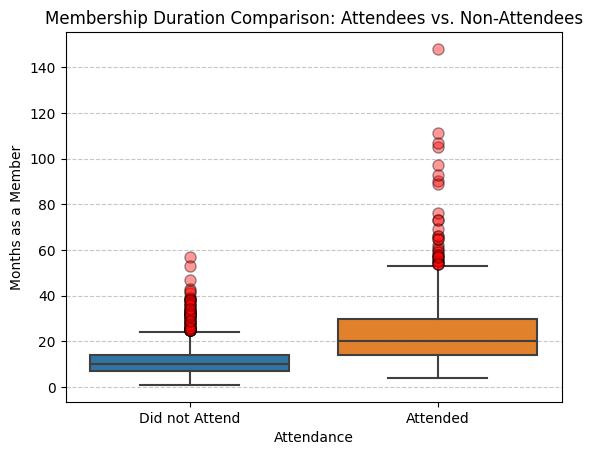

In [ ]:
# @title Membership Duration Comparison: Attendees vs. Non-Attendees Plot

outlier_props = dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black', alpha=0.4)

attendance_months = sns.boxplot(
        x='attended',
        y='months_as_member',
        data=fitness,
        flierprops = outlier_props
)

attendance_months.set_xticks(range(len(custom_x_ticks)))
attendance_months.set_xticklabels(custom_x_ticks)
attendance_months.set(xlabel='Attendance', ylabel='Months as a Member')
attendance_months.set_title("Membership Duration Comparison: Attendees vs. Non-Attendees")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From our plot, it's evident that members who attended the class have, on average, a longer membership duration compared to those who did not attend the class. A clear illustration of this is that 75% of the members who did not attend have a membership duration of less than 14 months, whereas 75% of the attending members have a membership duration of 14 months or more.

**Predicting wether a member will attend the class**

In order to predict whether members will attend or not, we will employ a classification model, as we aim to forecast a categorical outcome. For this purpose, I have chosen to utilize Logistic regression and a BaggingClassifier.

I chose **Logistic Regression** as my baseline model because of its clear interpretability as well as its simplicity compared to other more complex algorithms like neural networks.

I chose a **bagging ensemble of decision tree classifiers** for my comparison model due to its more complex approach of taking into account multiple models. The bootstrapped driven training also helps us visualize how our model will behave on unseen data with the 'out of bag evaluation'.

In [ ]:
# @title Final Clean to the DataFrame before training

# First, ensure 'unknown' is treated as a missing value (NA)
fitness['category'] = fitness['category'].replace('unknown', pd.NA)
fitness.dropna(subset=['category'], inplace=True)
fitness['category'] = fitness['category'].astype('category')
fitness = pd.get_dummies(fitness, columns=['day_of_week','time', 'category'])

In [ ]:
# @title Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

X = fitness.drop(labels=['attended','booking_id'],axis=1).values
y = fitness['attended'].values

seed = 49

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.3,
        random_state=seed
    )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=seed)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kf)
grid_search.fit(X_train_resampled, y_train_resampled)
best_logreg_model = grid_search.best_estimator_

logreg_cross_score = cross_val_score(
    best_logreg_model,
    X_train_scaled,
    y_train,
    cv=kf
)

best_logreg_model.fit(X_train_scaled, y_train)

y_pred_lg = best_logreg_model.predict(X_test_scaled)

In [ ]:
# @title Bagging Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import warnings; warnings.filterwarnings("ignore", category=FutureWarning)

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=0.15,
    random_state=seed
    )

bc_model =BaggingClassifier(
        estimator=dt_model,
        n_estimators=100,
        n_jobs=-1,
        oob_score=True
    )

param_grid = {
    'base_estimator__max_depth': [4, 6, 8],
    'base_estimator__min_samples_leaf': [0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 200]
}

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
grid_search = GridSearchCV(bc_model, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_bc_model = grid_search.best_estimator_
y_pred_best_bc = best_bc_model.predict(X_test)

In [ ]:
# @title Calculating the performance metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logreg_cross_val_avg = logreg_cross_score.mean()
accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)
confusion = confusion_matrix(y_test, y_pred_lg)
bagging_acc_score = accuracy_score(y_test, y_pred_best_bc)
bagging_precision = precision_score(y_test, y_pred_best_bc)
bagging_recall = recall_score(y_test, y_pred_best_bc)
bagging_f1 = f1_score(y_test, y_pred_best_bc)
bagging_confusion = confusion_matrix(y_test, y_pred_best_bc)

In [ ]:
# @title Performance metrics visualization

# Metrics for Logistic Regression Model
logreg_metrics = {
    "Model": ["Logistic Regression"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
}
logreg_metrics_df = pd.DataFrame(logreg_metrics)
logreg_metrics_df = logreg_metrics_df.set_index('Model')

# Metrics for Bagging Classifier Model
bagging_metrics = {
    "Model": ["Bagging Classifier"],
    "Accuracy": [bagging_acc_score],
    "Precision": [bagging_precision],
    "Recall": [bagging_recall],
    "F1-Score": [bagging_f1]
}
bagging_metrics_df = pd.DataFrame(bagging_metrics)
bagging_metrics_df = bagging_metrics_df.set_index('Model')
combined_metrics_df = pd.concat([logreg_metrics_df, bagging_metrics_df])

logreg_confusion_df = pd.DataFrame(
    confusion,
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]
)

bagging_confusion_df = pd.DataFrame(
    bagging_confusion,
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]
)

display(combined_metrics_df)
print('\n', "Logistic Regression Confusion Matrix")
display(logreg_confusion_df)
print('\n',"Bagging Classifier Confusion Matrix")
display(bagging_confusion_df)

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.765101,0.750000,0.413793,0.533333
Bagging Classifier,0.771812,0.708738,0.503448,0.588710



 Logistic Regression Confusion Matrix


,Predicted Negative,Predicted Positive
Actual Negative,282,20
Actual Positive,85,60



 Bagging Classifier Confusion Matrix


,Predicted Negative,Predicted Positive
Actual Negative,272,30
Actual Positive,72,73


 **Deciding the model to use**

 While the ensemble bagging method has a slightly better performance, the Logistic Regression model achieves a similar accuracy with less computation power. Additionally, the logistic regression model has better scalability, which would make our model more suitable as we gather more data in the future. This makes it the better model for this dataset.